In [1]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# List of subfolders
subfolders = ["beyza", "zeynep", "ezgi"]

# Set the path to the root directory
root_path = r"C:\Users\Beyza\Desktop\project"

images = []
labels = []

valid_extensions = {".jpg", ".jpeg", ".png"}

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)

    for folder_name in os.listdir(subfolder_path):
        folder_path = os.path.join(subfolder_path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if any(file_name.lower().endswith(ext) for ext in valid_extensions):
                    image_path = os.path.join(folder_path, file_name)
                    label = file_name.split('_')[2]
                    img = cv2.imread(image_path)
                    if img is None:
                        print(f"Failed to load image: {image_path}")
                    else:
                        img = cv2.resize(img, (64, 64))
                        images.append(img)
                        labels.append(label)

In [3]:
images = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

images = images / 255.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [5]:
# Define the CNN model with glorot_uniform initializer
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Define the optimizer with a custom learning rate (e.g., 0.001)
custom_learning_rate = 0.001
custom_optimizer = Adam(learning_rate=custom_learning_rate)

In [7]:
# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Create a generator for training data
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Create a generator for validation data
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

In [10]:
# Record the start time before compilation
start_time = time.time()

In [11]:
# Train the model
history_2 = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/40
527/527 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.0104 - loss: 5.1782 - val_accuracy: 0.0114 - val_loss: 4.6160
Epoch 2/40
527/527 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.0148 - loss: 4.5568 - val_accuracy: 0.0166 - val_loss: 4.4763
Epoch 3/40
527/527 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - accuracy: 0.0166 - loss: 4.4868 - val_accuracy: 0.0147 - val_loss: 4.6226
Epoch 4/40
527/527 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.0366 - loss: 4.3930 - val_accuracy: 0.0539 - val_loss: 4.2340
Epoch 5/40
527/527 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.0703 - loss: 4.0928 - val_accuracy: 0.0972 - val_loss: 3.9038
Epoch 6/40
527/527 ━━━━━━━━━━━━━━━━━━━━ 29s 54ms/step - accuracy: 0.1261 - loss: 3.7435 - val_accuracy: 0.1174 - val_loss: 3.8001
Epoch 7/40
527/527 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.1601 - loss: 3.5067 - val_accuracy: 0.1433 - val_loss: 3.7817
Epoch 8/40
527/527 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - accuracy: 0.1993 - loss: 3.2168 - 

In [12]:
# Record the end time after compilation
end_time = time.time()

# Calculate and print the compilation time
compilation_time = end_time - start_time
print(f"Model compilation time: {compilation_time} seconds")

Model compilation time: 1220.2674326896667 seconds


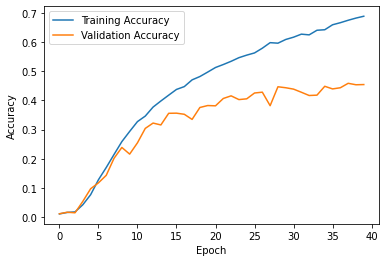

In [13]:
# Plot accuracy and validation accuracy graphs
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()